# Análise de Dados Financeiros
## O que é um "Unicórnio"?
"Unicórnio" é um termo usado na indústria de capital de risco para descrever uma startup de capital fechado com valor superior a US$ 1 bilhão. O termo foi popularizado pela primeira vez pela capitalista de risco Aileen Lee, fundadora da Cowboy Ventures, um fundo de capital de risco com sede em Palo Alto, Califórnia.

Unicórnios também podem se referir a um fenômeno de recrutamento no setor de recursos humanos (RH). Os gerentes de RH podem ter grandes expectativas para preencher um cargo, levando-os a procurar candidatos com qualificações superiores às exigidas para um cargo específico. Em essência, esses gerentes estão procurando um unicórnio, o que leva a uma desconexão entre seu candidato ideal e quem eles podem contratar do grupo de pessoas disponíveis.

São exemplos de startups unicónios: MadeiraMadeira, Hotmart, Mercado Bitcoin , Unico, Frete.com, CloudWalk, Nuvemshop, Daki, Facily e Olist.

link da Base de Dados: https://www.kaggle.com/datasets/ramjasmaurya/unicorn-startups


In [175]:
# Importando as libs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [176]:
# Lendo a base de dados
df = pd.read_csv('/content/unicorns till sep 2022.csv')
display(df)

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investors
0,ByteDance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$127,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."
...,...,...,...,...,...,...,...
1181,LeadSquared,$1,6/21/2022,India,Bengaluru,Internet software & services,"Gaja Capital Partners, Stakeboat Capital, West..."
1182,FourKites,$1,6/21/2022,United States,Chicago,"Supply chain, logistics, & delivery","Hyde Park Venture Partners, Bain Capital Ventu..."
1183,VulcanForms,$1,7/5/2022,United States,Burlington,"Supply chain, logistics, & delivery","Eclipse Ventures, D1 Capital Partners, Industr..."
1184,SingleStore,$1,7/12/2022,United States,San Francisco,Data management & analytics,"Google Ventures, Accel, Data Collective"



Ao ler a base de dados podemos perceber que ela é organizada pelo nome da empresa, quanto a empresa custa, a data que ela se tornou um unicórnio, o páis e a cidade de origem da empresa, a indústria a qual ela pertence e os investidores.

In [177]:
# Verificando a dimensão da base de dados
df.shape

(1186, 7)

A dimensão da nossa base de dados é 1186 linhas por 7 colunas

In [178]:
# Renomeando as colunas (Deixando em Português)

df.rename(
    columns={
        'Company' : 'empresa',
        'Valuation ($B)': 'valor($)',
        'Date Joined': 'data',
        'Country': 'pais',
         'City\xa0' :'cidade',
        'Industry': 'setor',
        'Investors':'investidores'
    }, inplace = True
)

In [179]:
# Verificando os tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   empresa       1186 non-null   object
 1   valor($)      1186 non-null   object
 2   data          1186 non-null   object
 3   pais          1186 non-null   object
 4   cidade        1186 non-null   object
 5   setor         1186 non-null   object
 6   investidores  1168 non-null   object
dtypes: object(7)
memory usage: 65.0+ KB


Ao verificarmos os tipos de dados em cada coluna podemos perceber que as colunas valor e data estão sendo lidas como 'Object', isto é, como uma string. Entretanto, esse não é o tipo de dado desejado para a nossa análise.

In [180]:
# Convertendo Dados
df['data'] = pd.to_datetime(df['data'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   empresa       1186 non-null   object        
 1   valor($)      1186 non-null   object        
 2   data          1186 non-null   datetime64[ns]
 3   pais          1186 non-null   object        
 4   cidade        1186 non-null   object        
 5   setor         1186 non-null   object        
 6   investidores  1168 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 65.0+ KB


In [181]:
# Convertendo Dados
df['data'] = pd.to_datetime(df['data'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   empresa       1186 non-null   object        
 1   valor($)      1186 non-null   object        
 2   data          1186 non-null   datetime64[ns]
 3   pais          1186 non-null   object        
 4   cidade        1186 non-null   object        
 5   setor         1186 non-null   object        
 6   investidores  1168 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 65.0+ KB


Agora falta apenas tratar o tipo de dado da coluna valor, que é um número.

In [182]:
# convertendo a coluna de valores para float
df['valor($)'] = [float(i.replace('$','')) for i in df['valor($)'] ]
df['valor($)']

0       140.0
1       127.0
2       100.0
3        95.0
4        40.0
        ...  
1181      1.0
1182      1.0
1183      1.0
1184      1.0
1185      1.0
Name: valor($), Length: 1186, dtype: float64

Uma vez que já tratamos nossos dados, vamos verificar se é necessário realizar a limpeza da nossa base de dados, isto é, verificar se há campos vazios e, caso houver, se eles atrapalhariam na nossa análise ou não.

In [183]:
# Verificando se há muitas informações em falta ( Campos nulos)

df.isnull().sum()

empresa          0
valor($)         0
data             0
pais             0
cidade           0
setor            0
investidores    18
dtype: int64

Perceba que usamos a função 'isnull' para verificar se há dados nulos e depois aplicamos a função 'sum' que soma e mostra onde estão os dados nulos, caso existam. Assim, vimos que apenas a coluna investidores tem dados nulos e esses somam 18.

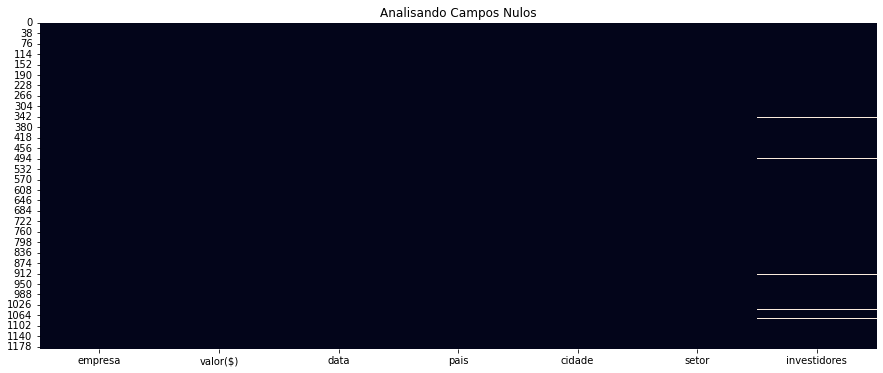

In [184]:
# Observando dados nulos em um mapa de calor
plt.figure(figsize=(15,6))
plt.title('Analisando Campos Nulos')
sns.heatmap(df.isnull(), cbar=False);

In [185]:
# Verificando valores únicos
df.nunique()

empresa         1183
valor($)         222
data             695
pais              48
cidade           286
setor             34
investidores    1152
dtype: int64

In [186]:
# Visualizando Rank dos Setores mais presentes nos Unicornios
df['setor'].value_counts()

Fintech                                                               239
Internet software & services                                          224
E-commerce & direct-to-consumer                                       103
Health                                                                 94
Artificial intelligence                                                74
Supply chain, logistics, & delivery                                    65
Other                                                                  65
Cybersecurity                                                          58
Data management & analytics                                            45
Auto & transportation                                                  40
Hardware                                                               38
Mobile & telecommunications                                            37
Edtech                                                                 32
Consumer & retail                     

Extraímos disso, que o top 3 dos setores mundiais que mais tem unicórnio são as FinTechs, Internet software & services e E-commerce. Podemos ainda verificar essa informação por meio de porcentagens usando o parâmetro 'Normalize'

In [187]:
# Visualizando Rank dos Setores %
df['setor'].value_counts(normalize=True).head()


Fintech                            0.201518
Internet software & services       0.188870
E-commerce & direct-to-consumer    0.086847
Health                             0.079258
Artificial intelligence            0.062395
Name: setor, dtype: float64

Agora conseguimos observar que o top 3 mencionado anteriormente ocupa cerca de 47% do rank mundial. Para ficar mais apresentável, vamos expor os 10 setores que mais geram unicórnios.

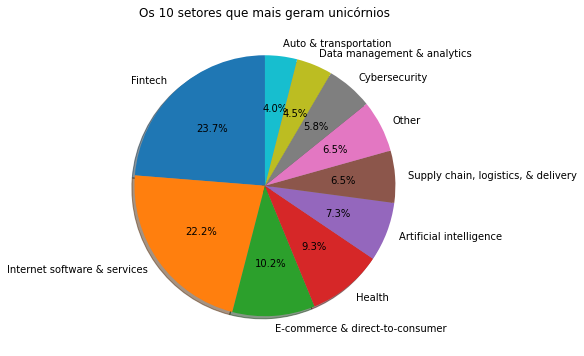

In [188]:
# Visualizando setores em gráficos de Pizza
setores = df['setor'].value_counts(normalize=True) *100 
plt.figure(figsize=(15,6))
plt.title('Os 10 setores que mais geram unicórnios')
plt.pie(
    setores.head(10),
    labels = setores.index[0:10],
    shadow= True,
    startangle=90,
    autopct='%1.1f%%'
    );

Ficou bem mais interessante a visualização desse modo. Outra informação que é relevante e que também é importante ver desse mesmo ponto de vista é qual país mais gera unicórnios.

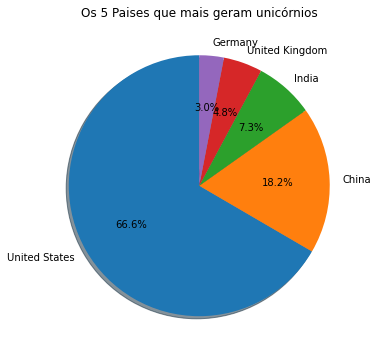

In [189]:
# Analisando quais paises mais geram unicórnios

paises = df['pais'].value_counts(normalize=True) *100 
plt.figure(figsize=(15,6))
plt.title('Os 5 Paises que mais geram unicórnios')
plt.pie(
    paises.head(),
    labels = paises.index[0:5],
    shadow= True,
    startangle=90,
    autopct='%1.1f%%'
    );

Disso conseguimos perceber que os Estados Unidos é o pais que mais gera unicórnios no mundo. Perceba que o Brasil não aparece entre os 5 primeiros. Assim, é pertinente para uma empresa nacional saber em qual colocação o Brasil está.

In [190]:
# Procurando a posição do Ranking que o Brasil está
rank = df['pais'].value_counts()
for i,j in enumerate(rank.index):
  if j == 'Brazil':
    print(f'A colocação do {j} é {i+1}') 

A colocação do Brazil é 9


Ou seja, o Brasil é o nono país que mais gera StartUps Unicónios.
Já descobrimos que o setor mais lucrativo (ou que gera mais unicórnios) é o de Fintech e descobrimos também que o pais que mais possui unicórnios é o estados unidos. Vamos descobrir, por meio de análise, quanto vale o setor de FinTech e os Estados Unidos.

In [191]:
# Analisando a valuation em cada país.
analise_paises = df.groupby(by=['pais']).sum()['valor($)'].reset_index()
analise_paises = analise_paises.sort_values('valor($)', ascending=False)
analise_paises.head(10)

,pais,valor($)
46,United States,2069.89
9,China,678.59
45,United Kingdom,205.45
20,India,202.92
18,Germany,80.88
17,France,58.42
1,Australia,54.40
7,Canada,49.23
23,Israel,48.02
6,Brazil,40.08


In [199]:
# Média de faturamento dos unicórnios
analise_paises['valor($)'].mean()

80.33375

A tabela acima mostra o top 5 de países que tem as maiores receitas geradas por unicórnios. Lembrando do gráfico de setores que fizemos anteriomente mostrava os paises que mais geram Unicórnios podemos perceber que a India é o terceiro pais na colocação, entretanto na nossa tabela ela está em quarto. Isso quer dizer que ter mais unicórnios não significa ter mais receita gerada por elas. Com isso, vamos analisar qual a colocação do Brasil em relação a receita.

In [192]:
# Verificando a colocação do Brasil na tabela de receitas
for i,j in enumerate(analise_paises['pais']):
  if j =='Brazil':
    print(f"A colocação do {j} é {i+1}")

A colocação do Brazil é 10


Ou seja, mesmo sendo o oitavo pais que mais tem unicórnios é o sexto país que tem maior receita por meio delas. Embora a tabela nos mostre de forma clara que os Estados Unidos tem a receita por meio de unicórnios maior que a dos outros paises, podemos esboçar isso de maneira gráfica deixando mais 'na cara' essa diferença tão absurda.

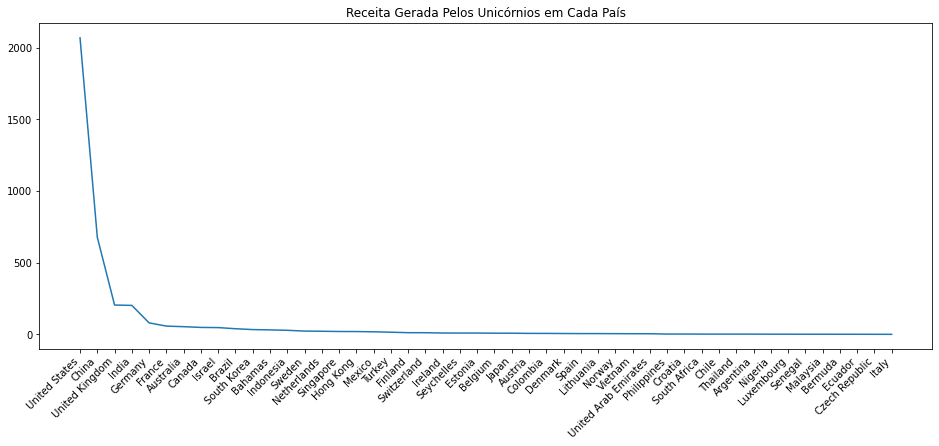

In [193]:
# Plotando gráfico de receita dos paises
plt.figure(figsize=(16,6))
plt.plot(analise_paises['pais'],analise_paises['valor($)'])
plt.title('Receita Gerada Pelos Unicórnios em Cada País')
plt.xticks(rotation=45,ha='right');

Com isso, vemos a diferença é realmente impressionante dos Estados Unidos e outros paises. 

# Relatório Final 
## Geral
Por meio da nossa análise pudemos perceber que os setores que mais geram unicórnios são Fintech, Internet software & services , E-commerce & direct-to-consumer de modo que esses três setores juntos ocupam praticamente 50% do mercado. 

Além disso, verificamos que os estados unidos é o pais que mais gera Unicórnios totalizando, sozinho, cerca de 66% dos paises geradores de Unicórnios. Além de ser o pais que mais gera receita por meio delas de forma que seu faturamento é 
quase 26x a mais que a média de faturamento dos paises que geram unicórnios.

## Nacional

A nível nacional pudemos ver que o Brasil está entre o top10 dos paises que mais geram unicórnios, bem como em relação ao seu faturamento. Sendo o nono país que mais gera unicórnios e o 10 décimos pais com a maior receita gerada pelos unicórnios sendo sua receita 40.08 Bilhões